# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

/home/gabriel/Documents/ic/rgpe/experiments


# Loading data

In [4]:
import os

print(os.getcwd())

# df = pd.read_csv("dataset/gram_distance.csv")

# X = df[["gram_point"]].values
# y = df["distance_to_zero"].values

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X, y)

# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=42
# )

/home/gabriel/Documents/ic/rgpe/experiments


# Gráfico gram point x distancia para zero

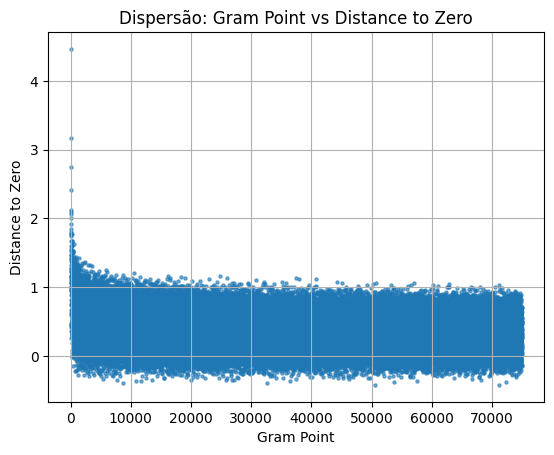

In [4]:
plt.scatter(df["gram_point"], df["distance_to_zero"], s=5, alpha=0.6)
plt.xlabel("Gram Point")
plt.ylabel("Distance to Zero")
plt.title("Dispersão: Gram Point vs Distance to Zero")
plt.grid(True)
plt.show()

# SVR Clássico

In [5]:
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.01, 0.1, 0.2]
best_mse = float("inf")
results: list[dict] = []

for C in C_values:
    for epsilon in epsilon_values:
        svr = SVR(kernel="rbf", C=C, epsilon=epsilon)
        start_time = time.time()
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)
        end_time = time.time()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({
            "C": C,
            "epsilon": epsilon,
            "mse": mse,
            "r2": r2,
            "exec_time": end_time - start_time
        })

df_results = pd.DataFrame(results)
print(df_results)
df_results.to_csv("results/svr_v1.csv", index=False)

      C  epsilon       mse        r2   exec_time
0   0.1     0.01  0.054192  0.042884  387.456031
1   0.1     0.10  0.054200  0.042739  327.617187
2   0.1     0.20  0.054204  0.042665   89.385622
3   1.0     0.01  0.054149  0.043651  219.361875
4   1.0     0.10  0.054161  0.043438  330.593244
5   1.0     0.20  0.054164  0.043386   90.835691
6  10.0     0.01  0.054116  0.044228  225.722287
7  10.0     0.10  0.054128  0.044022  156.098603
8  10.0     0.20  0.054132  0.043949   91.732218


## QSVR

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVR
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2 as BackendSampler

df = pd.read_csv("dataset/gram_distance.csv")

X = df[["gram_point"]].values
y = df["distance_to_zero"].values

X = X[:50]
y = y[:50]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

sampler  = BackendSampler(backend=AerSimulator())
fidelity = ComputeUncompute(sampler=sampler)

feature_map    = ZZFeatureMap(feature_dimension=2, reps=2)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

qsvr = QSVR(quantum_kernel=quantum_kernel)

print("Training QSVR model...")
qsvr.fit(X_train, y_train)

y_pred = qsvr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/gram_distance.csv'